<a href="https://colab.research.google.com/github/Ali-MH-Mansour/Keyword-Extraction/blob/main/Method/Recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.flush_and_unmount(timeout_ms=24)

Mounted at /content/drive


In [ ]:
text= """doc ======================================================
doc ======================================================

doc ======================================================
doc ======================================================
doc ======================================================"""
print(len(text.split("\n")))

59


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/PHD/Data/UUCF Assignment Spreadsheet.xls')
data.head()

,Unnamed: 0,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,11: Star Wars: Episode IV - A New Hope (1977),NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,5.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,12: Finding Nemo (2003),NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,5.0,NaN,4.0,5.0,4.5,NaN,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,13: Forrest Gump (1994),NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,5.0,5.0,4.5,4.5,5.0,3.0,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,14: American Beauty (1999),NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,5.0,3.5,5.0,3.5,NaN,4.0,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,22: Pirates of the Caribbean: The Curse of the...,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,4.0,4.0,4.5,4.0,NaN,1.0,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5


In [ ]:
#movies names return a rows for a cloumn
dd = data['Unnamed: 0']
dd

0         11: Star Wars: Episode IV - A New Hope (1977)
1                               12: Finding Nemo (2003)
2                               13: Forrest Gump (1994)
3                            14: American Beauty (1999)
4     22: Pirates of the Caribbean: The Curse of the...
                            ...                        
95                         9806: The Incredibles (2004)
96                   10020: Beauty and the Beast (1991)
97                                  36657: X-Men (2000)
98                       36658: X2: X-Men United (2003)
99                              36955: True Lies (1994)
Name: Unnamed: 0, Length: 100, dtype: object

In [ ]:
#all cols without one
uu = data.loc[:, data.columns != 'Unnamed: 0']
uu

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,5.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,5.0,NaN,4.0,5.0,4.5,NaN,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,5.0,5.0,4.5,4.5,5.0,3.0,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,5.0,3.5,5.0,3.5,NaN,4.0,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,4.0,4.0,4.5,4.0,NaN,1.0,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.5,5.0,3.5,NaN,3.0,3.5,4.5,5.0,3.5,4.0,NaN,4.5,4.0,NaN,NaN,3.5,0.5,5.0,3.5,3.0,NaN,NaN,4.5,NaN,3.5
96,3.0,5.0,NaN,NaN,4.0,3.5,NaN,2.0,4.0,3.0,NaN,4.0,3.0,NaN,NaN,4.0,NaN,4.0,2.0,2.5,NaN,NaN,4.0,NaN,NaN
97,NaN,4.5,NaN,NaN,4.0,NaN,4.5,5.0,4.0,5.0,NaN,4.0,3.5,NaN,4.0,3.5,NaN,3.0,4.0,3.5,NaN,NaN,NaN,3.0,4.0
98,3.5,4.0,NaN,NaN,3.5,NaN,4.5,4.5,4.0,5.0,NaN,4.5,3.5,NaN,4.0,3.5,NaN,2.0,NaN,3.0,4.0,NaN,3.5,NaN,4.0


In [ ]:
# print row of datafr for a specific user
#data.loc[[0]][5136]
datam= data.set_index('Unnamed: 0')
for d in datam:
  print(d)

1648
5136
918
2824
3867
860
3712
2968
3525
4323
3617
4360
2756
89
442
3556
5261
2492
5062
2486
4942
2267
4809
3853
2288


In [ ]:
uu_sim = data.corr() # it retuen dataframe
uu_sim

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
1648,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,-0.041734,0.264425,0.261268,0.464610,0.022308,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
5136,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,0.138548,0.152948,0.148882,0.562449,0.414438,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
918,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,0.011316,-0.231660,0.148431,0.267029,0.304139,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
2824,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,0.282756,-0.005326,-0.087747,0.241567,0.116532,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
3867,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,-0.066576,-0.093801,0.310104,-0.003878,0.113581,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856
860,0.480537,0.241377,0.468333,-0.008066,0.282497,1.000000,0.171151,0.072927,0.387133,0.146158,0.219929,-0.005316,0.323499,0.539066,0.181276,0.347470,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
3712,-0.312412,0.131398,0.092037,0.462910,0.400275,0.171151,1.000000,0.065015,0.095623,-0.292501,-0.038900,-0.364324,0.126899,-0.051320,0.227130,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.193660,0.113266
2968,0.383348,0.206695,-0.045854,0.214760,0.264249,0.072927,0.065015,1.000000,0.028529,-0.073252,0.312573,0.053024,0.143347,-0.118085,0.100841,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
3525,0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.000000,0.210879,0.243283,-0.086061,0.058365,0.475495,0.201734,0.475711,0.306957,0.136343,0.301750,0.143414,0.056100,0.179908,0.284648,0.170757,0.193131
4323,0.098191,0.033642,-0.035394,0.119350,-0.333602,0.146158,-0.292501,-0.073252,0.210879,1.000000,0.022907,0.252529,-0.221789,0.258866,-0.024337,-0.040606,0.155045,-0.204164,0.263654,0.167198,-0.084592,0.315712,0.085673,-0.109892,-0.279385


In [ ]:
target_cor = uu_sim.loc[89]
print("row of target user corr ",target_cor)

row of target user corr  1648    0.464610
5136    0.562449
918     0.267029
2824    0.241567
3867   -0.003878
860     0.539066
3712   -0.051320
2968   -0.118085
3525    0.475495
4323    0.258866
3617    0.278335
4360   -0.115492
2756    0.290591
89      1.000000
442     0.296826
3556    0.326774
5261    0.291476
2492    0.372676
5062    0.525990
2486    0.123380
4942    0.178088
2267    0.088600
4809    0.668516
3853    0.179680
2288    0.155869
Name: 89, dtype: float64


In [ ]:
top_neighbors = target_cor.nlargest(5+1, keep='first') # n+1 with consider the user 
top_neighbors

89      1.000000
4809    0.668516
5136    0.562449
860     0.539066
5062    0.525990
3525    0.475495
Name: 89, dtype: float64

In [ ]:
neighbors = top_neighbors.iloc[1:]
#type(neighbors)
neighbors

4809    0.668516
5136    0.562449
860     0.539066
5062    0.525990
3525    0.475495
Name: 89, dtype: float64

In [ ]:
#list(neighbors.index)
neighbors.index

Index([4809, 5136, 860, 5062, 3525], dtype='object')

In [ ]:
neighbors.values

array([0.66851595, 0.56244874, 0.53906585, 0.52599044, 0.47549485])

In [ ]:
def get_top_users(uu_sim,target,n=5):
    target_cor = uu_sim.loc[target]
    top_neighbors = target_cor.nlargest(n+1).iloc[1:]
    return top_neighbors

In [ ]:
def get_user_movie_score(movie,user):

    neighbors = get_top_users(uu_sim,user)
    #print("استدعاء", movie.head())
    rating_sum = 0
    weight_sum = 0
    for useri , w in zip(neighbors.index,neighbors.values):
        #print("user ", user ," w ",w, " movie[user] ", movie[user])
        if np.isnan(movie[useri]):
            continue
        rating_sum += movie[useri] * w
        weight_sum += w
    if weight_sum == 0:
        return 0
    else:
        return rating_sum/weight_sum

In [ ]:
pred_3867 = data.apply(get_user_movie_score,axis=1,args=(89,)) # axis =1 row |  args : tuple / list of arguments to passed to function.
# row = row indexes values first row
# movie [user] return value of rating for the index in sended row 

In [ ]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b)
x

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/PHD/Data/UUCF Assignment Spreadsheet.xls')
data.head()

,Unnamed: 0,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,11: Star Wars: Episode IV - A New Hope (1977),NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,5.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,12: Finding Nemo (2003),NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,5.0,NaN,4.0,5.0,4.5,NaN,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,13: Forrest Gump (1994),NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,5.0,5.0,4.5,4.5,5.0,3.0,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,14: American Beauty (1999),NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,5.0,3.5,5.0,3.5,NaN,4.0,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,22: Pirates of the Caribbean: The Curse of the...,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,4.0,4.0,4.5,4.0,NaN,1.0,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5


In [ ]:
# formula user mean rates
ru = data.loc[:, 1648].mean()
ru

3.6515151515151514

In [ ]:
data = data.rename(columns = {'Unnamed: 0': 'Movie_name'}, inplace = False)

In [ ]:
pred_3867.sort_values(ascending=False)[:3]

27    4.894124
33    4.882194
64    4.774093
dtype: float64

In [ ]:
pred_89.sort_values(ascending=False)[:3]


27    4.894124
33    4.882194
64    4.774093
dtype: float64

# Part 2 - **Normalization**

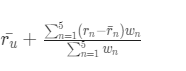

In [ ]:
def get_norm_user_movie_score(movie,user):
    neighbors = get_top_users(uu_sim,user)
    print("Top neighbors", neighbors)
    rating_sum = 0
    weight_sum = 0
    user_rating_mean = data.loc[:,user].mean()
    for user , w in zip(neighbors.index,neighbors.values):
        print("user ", user ," w ",w, " movie[user] ", movie[user])
        
        if np.isnan(movie[user]):
            continue
        movie_user_mean = data.loc[:,user].mean()
        rating_sum += (movie[user]-movie_user_mean) * w    # sum (rn-rn' * wn)
        weight_sum += w                                    # sum wn
    if weight_sum == 0:
        return 0
    else:
        return user_rating_mean + rating_sum/weight_sum

In [ ]:
norm_pred_3867 = data.apply(get_norm_user_movie_score,axis=1,args=(3867,))

Top neighbors 2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64
user  2492  w  0.47668328054517956  movie[user]  4.5
user  3853  w  0.46411014776485626  movie[user]  nan
user  2486  w  0.4389915544146359  movie[user]  3.5
user  3712  w  0.40027450425381644  movie[user]  nan
user  2288  w  0.3798562650229304  movie[user]  nan
Top neighbors 2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64
user  2492  w  0.47668328054517956  movie[user]  3.5
user  3853  w  0.46411014776485626  movie[user]  nan
user  2486  w  0.4389915544146359  movie[user]  2.0
user  3712  w  0.40027450425381644  movie[user]  4.5
user  2288  w  0.3798562650229304  movie[user]  3.5
Top neighbors 2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64
user  2492  w  0.47668328054517956  movie[user]  3.5
user  3853  w  0.46411014776485626  movie[u

In [ ]:
norm_pred_89 = data.apply(get_norm_user_movie_score,axis=1,args=(89,))

In [ ]:
norm_pred_3867.sort_values(ascending=False)[:3]

77    5.245509
21    4.856770
8     4.777803
dtype: float64

In [ ]:
norm_pred_89.sort_values(ascending=False)[:3]

27    5.322015
33    5.261424
32    5.241111
dtype: float64

# Item = item

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/PHD/Data/Assignment 5.xls', sheet_name=0)
data = data.fillna(0)

In [ ]:
data
#data.values[:-1,1:-1]

,User,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995),Mean
0,755,2.00000,5.000000,2.000000,0.000000,4.0000,4.000000,1.000000,2.000000,0.000000,3.000000,2.00000,0.00000,5.00000,2.000000,5.000000,4.000000,2.000000,5.000000,0.00000,0.000000,3.200000
1,5277,1.00000,0.000000,0.000000,2.000000,4.0000,2.000000,5.000000,0.000000,0.000000,4.000000,3.00000,2.00000,2.00000,0.000000,2.000000,0.000000,5.000000,1.000000,3.00000,0.000000,2.769231
2,1577,0.00000,0.000000,0.000000,5.000000,2.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.00000,4.00000,4.000000,1.000000,1.000000,2.000000,3.000000,1.00000,3.000000,2.333333
3,4388,2.00000,3.000000,0.000000,0.000000,0.0000,1.000000,0.000000,3.000000,4.000000,0.000000,0.00000,4.00000,0.00000,3.000000,5.000000,0.000000,5.000000,1.000000,1.00000,2.000000,2.833333
4,1202,0.00000,3.000000,4.000000,1.000000,4.0000,1.000000,4.000000,4.000000,0.000000,1.000000,5.00000,1.00000,0.00000,4.000000,0.000000,3.000000,5.000000,5.000000,0.00000,0.000000,3.214286
5,3823,3.00000,4.000000,4.000000,4.000000,0.0000,0.000000,2.000000,1.000000,4.000000,4.000000,5.00000,2.00000,4.00000,0.000000,1.000000,0.000000,0.000000,3.000000,0.00000,2.000000,3.071429
6,5448,0.00000,0.000000,3.000000,1.000000,1.0000,4.000000,4.000000,5.000000,2.000000,0.000000,1.00000,0.00000,0.00000,3.000000,0.000000,1.000000,0.000000,0.000000,5.00000,2.000000,2.666667
7,5347,2.00000,0.000000,0.000000,0.000000,3.0000,2.000000,4.000000,0.000000,3.000000,0.000000,0.00000,2.00000,1.00000,2.000000,4.000000,0.000000,1.000000,3.000000,5.00000,0.000000,2.666667
8,4117,4.00000,1.000000,0.000000,4.000000,2.0000,4.000000,5.000000,4.000000,0.000000,1.000000,2.00000,0.00000,1.00000,0.000000,5.000000,0.000000,0.000000,0.000000,0.00000,5.000000,3.166667
9,2765,4.00000,2.000000,0.000000,5.000000,3.0000,0.000000,4.000000,3.000000,4.000000,0.000000,0.00000,0.00000,2.00000,0.000000,0.000000,2.000000,5.000000,1.000000,0.00000,0.000000,3.181818


In [ ]:
matrix = pd.read_excel('/content/drive/MyDrive/PHD/Data/Assignment 5.xls', sheet_name=2)

In [ ]:
matrix

,Unnamed: 0,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,1: Toy Story (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210: Star Wars: Episode VI - Return of the Je...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,356: Forrest Gump (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"318: Shawshank Redemption, The (1994)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"593: Silence of the Lambs, The (1991)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3578: Gladiator (2000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,260: Star Wars: Episode IV - A New Hope (1977),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2028: Saving Private Ryan (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,296: Pulp Fiction (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1259: Stand by Me (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#sim_array = cosine_similarity(data.values[:-1,1:-1].T)

In [ ]:
#جميع الاسطر ماعدا سطر ل2 اخر سطر لذلك وضع -1
#الاعمدة الاول وحتى قبل الاخير
# لان الاول هو رقم اليوزر والاخير هو المتوسط
data.values[:-1,1:-1]

array([[2.0, 5.0, 2.0, 0.0, 4.0, 4.0, 1.0, 2.0, 0.0, 3.0, 2.0, 0.0, 5.0,
        2.0, 5.0, 4.0, 2.0, 5.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 2.0, 4.0, 2.0, 5.0, 0.0, 0.0, 4.0, 3.0, 2.0, 2.0,
        0.0, 2.0, 0.0, 5.0, 1.0, 3.0, 0.0],
       [0.0, 0.0, 0.0, 5.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 4.0,
        4.0, 1.0, 1.0, 2.0, 3.0, 1.0, 3.0],
       [2.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 4.0, 0.0, 0.0, 4.0, 0.0,
        3.0, 5.0, 0.0, 5.0, 1.0, 1.0, 2.0],
       [0.0, 3.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 0.0, 1.0, 5.0, 1.0, 0.0,
        4.0, 0.0, 3.0, 5.0, 5.0, 0.0, 0.0],
       [3.0, 4.0, 4.0, 4.0, 0.0, 0.0, 2.0, 1.0, 4.0, 4.0, 5.0, 2.0, 4.0,
        0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 2.0],
       [0.0, 0.0, 3.0, 1.0, 1.0, 4.0, 4.0, 5.0, 2.0, 0.0, 1.0, 0.0, 0.0,
        3.0, 0.0, 1.0, 0.0, 0.0, 5.0, 2.0],
       [2.0, 0.0, 0.0, 0.0, 3.0, 2.0, 4.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0,
        2.0, 4.0, 0.0, 1.0, 3.0, 5.0, 0.0],
       [4.0, 1.0, 0.0, 4.0, 2.0, 4.0, 5.0, 4.0, 0.0, 1.0, 2.0, 0

In [ ]:
#منقول المصفوفة
data.values[:-1,1:-1].T

array([[2.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 4.0, 4.0, 5.0, 2.0, 4.0,
        3.0, 2.0, 0.0, 2.0, 4.0, 2.0, 2.0],
       [5.0, 0.0, 0.0, 3.0, 3.0, 4.0, 0.0, 0.0, 1.0, 2.0, 1.0, 5.0, 0.0,
        0.0, 4.0, 0.0, 0.0, 5.0, 1.0, 2.0],
       [2.0, 0.0, 0.0, 0.0, 4.0, 4.0, 3.0, 0.0, 0.0, 0.0, 5.0, 2.0, 0.0,
        3.0, 0.0, 1.0, 0.0, 1.0, 3.0, 2.0],
       [0.0, 2.0, 5.0, 0.0, 1.0, 4.0, 1.0, 0.0, 4.0, 5.0, 0.0, 0.0, 5.0,
        0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 4.0],
       [4.0, 4.0, 2.0, 0.0, 4.0, 0.0, 1.0, 3.0, 2.0, 3.0, 0.0, 0.0, 4.0,
        2.0, 5.0, 3.0, 0.0, 1.0, 0.0, 5.0],
       [4.0, 2.0, 0.0, 1.0, 1.0, 0.0, 4.0, 2.0, 4.0, 0.0, 5.0, 0.0, 0.0,
        0.0, 5.0, 2.0, 0.0, 1.0, 4.0, 0.0],
       [1.0, 5.0, 0.0, 0.0, 4.0, 2.0, 4.0, 4.0, 5.0, 4.0, 2.0, 3.0, 2.0,
        3.0, 4.0, 0.0, 0.0, 4.0, 5.0, 1.0],
       [2.0, 0.0, 0.0, 3.0, 4.0, 1.0, 5.0, 0.0, 4.0, 3.0, 0.0, 0.0, 5.0,
        0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 3.0],
       [0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 2.0, 3.0, 0.0, 4.0, 0.0, 1

In [ ]:
sim_array = cosine_similarity(data.values[:-1,1:-1].T)

In [ ]:
sim_array.shape

(20, 20)

In [ ]:
#You can compute pairwise cosine similarity on the rows of a sparse matrix directly using sklearn. 
#As of version 0.17 it also supports sparse output:
#
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import numpy as np

A =  np.array([[0, 1, 0, 0, 1], 
               [0, 0, 1, 1, 1],
               [1, 1, 0, 1, 0]])

similarities = cosine_similarity(A)

In [ ]:
similarities

array([[1.        , 0.40824829, 0.40824829],
       [0.40824829, 1.        , 0.33333333],
       [0.40824829, 0.33333333, 1.        ]])

In [ ]:
similarities = cosine_similarity(A_sparse)
similarities

array([[1.        , 0.40824829, 0.40824829],
       [0.40824829, 1.        , 0.33333333],
       [0.40824829, 0.33333333, 1.        ]])

In [ ]:
A_sparse

<3x5 sparse matrix of type '<class 'numpy.longlong'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
print('pairwise dense output:\n {}\n'.format(similarities))


pairwise dense output:
 [[1.         0.40824829 0.40824829]
 [0.40824829 1.         0.33333333]
 [0.40824829 0.33333333 1.        ]]



## If you want column-wise cosine similarities simply transpose your input matrix beforehand:



In [ ]:
A_sparse.transpose()

<5x3 sparse matrix of type '<class 'numpy.longlong'>'
	with 8 stored elements in Compressed Sparse Column format>

In [ ]:
#The following method is about 30 times faster than scipy.spatial.distance.pdist. 
#It works pretty quickly on large matrices (assuming you have enough RAM)
#See below for a discussion of how to optimize for sparsity.